In [1]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from scipy.spatial.distance import pdist, squareform, cdist
# Importacion de paquetes necesarios
import pandas as pd
from pandas.core.common import flatten
import json
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def calculo_sse(labels,data,centers):
    sse = 0.
    for i in range(0,len(centers)):
        sse = sse + sum(np.power(cdist([centers[i]], data.iloc[labels== i,], 'euclidean')[0],2))
    return sse
kmax = 20
sil = []
sse = []


In [2]:
df_clean = pd.read_csv("data_analisis/discount_train.csv")

In [7]:
from sklearn.decomposition import PCA 
km = KMeans(n_clusters=6).fit(df_clean)
df_clean["Cluster"]=km.labels_
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(df_clean) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 


In [ ]:
for i in range(2,kmax):   
    k = KMeans(n_clusters=i).fit(df_clean)
    sil.append(silhouette_score(df_clean, k.labels_))
    sse.append(calculo_sse(k.labels_, df_clean,k.cluster_centers_))

In [ ]:
x = np.arange(2, kmax)
fig = plt.figure()
axsil = fig.add_axes([0.05,0.05,0.9,0.475])
plt.plot(x,sil)
axsse = fig.add_axes([0.05,0.525,0.9,0.475])
plt.plot(x,sse)

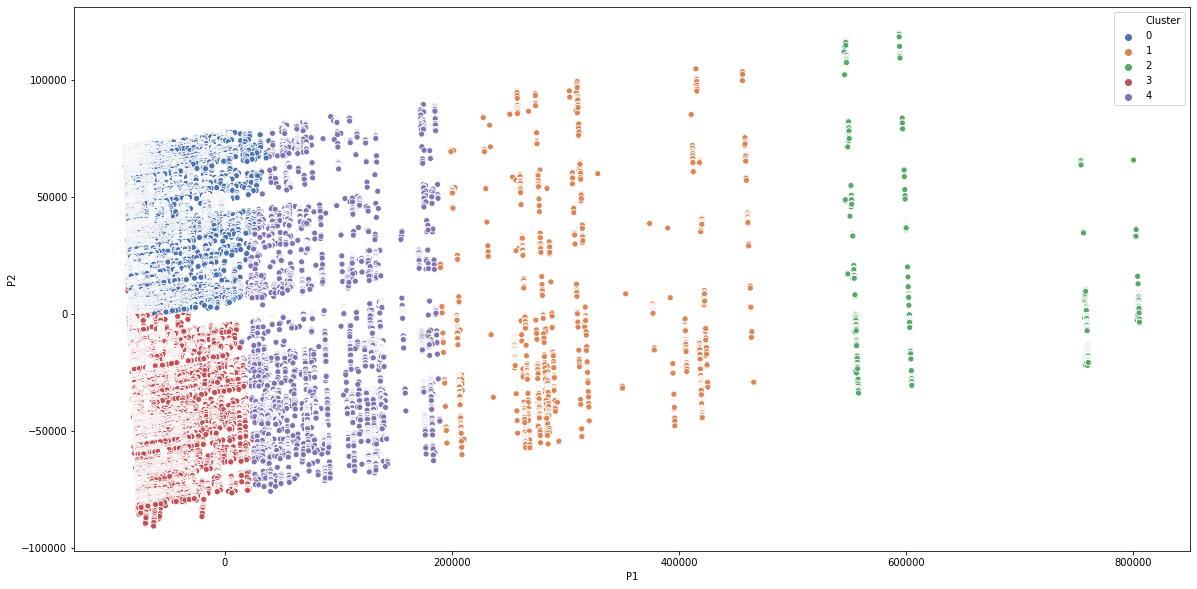

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x ="P1",y ="P2",data = X_principal,  hue=df_clean["Cluster"], palette= (sns.color_palette("deep", 5)))
